In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
train_X=pd.read_csv("Logistic regression data set/train_X.csv")
train_Y=pd.read_csv("Logistic regression data set/train_Y.csv")
X0=np.random.randint(1,2,train_X.shape[0])
train_X["X0"]=X0
train_X.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,X0
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,0,1
2,2,3,1,26.0,0,0,7.9250,1,1
3,3,1,1,35.0,1,0,53.1000,1,1
4,4,3,0,35.0,0,0,8.0500,1,1


In [62]:
train_Y.head()

,Id,Survived
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0


In [63]:
train_X=train_X.drop("Id",axis=1)
train_Y=train_Y.drop("Id",axis=1)
train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,X0
0,3,0,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,0,1
2,3,1,26.0,0,0,7.9250,1,1
3,1,1,35.0,1,0,53.1000,1,1
4,3,0,35.0,0,0,8.0500,1,1


In [64]:
train_Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [65]:
train_X=train_X.values
train_Y=train_Y.values      # .values to change dataframe into aray
train_X=train_X.T
train_X.shape

(8, 891)

In [66]:
train_Y=train_Y.T
train_Y.shape

(1, 891)

In [67]:
print(train_X.shape)
print(train_Y.shape)


(8, 891)
(1, 891)


In [68]:
n=train_X.shape[0]
m=train_X.shape[1]
alpha=0.0005
theta=np.zeros((n,1))
itrar=[]
costar=[]
for i in range(1000):
    def sigmoid(Z):
            return 1/(1+np.exp(-Z))
    Z=np.dot(theta.T,train_X)
    hypo=sigmoid(Z)
    deltheta=(1/m)*np.dot((hypo-train_Y),train_X.T)
    theta=theta-alpha*(deltheta.T)
    cost=-(1/m)*np.sum(train_Y*np.log(hypo)+(1-train_Y)*np.log(1-hypo))
    itrar.append(cost)
    costar.append(i)

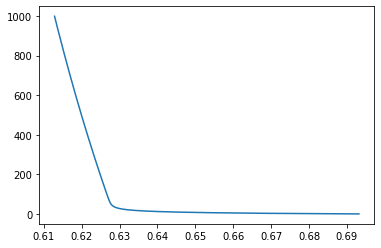

In [69]:
plt.plot(itrar,costar)